# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import os
import openweathermapy.core as owm
import datetime as dt

import datetime
d = datetime.datetime.today()
today = (f"{d.year}/{d.month}/{d.day}")

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# APPROACH-1
# ---------------
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)
# print(cities)

In [10]:
# APPROACH 2
#----------------

# Generating "AT LEAST" 500 random cities (enter more than 1300 cities to factor in same city in the list)

no_of_cities = 1500

# -- using list comprehension

coordinates = [((np.random.uniform(-90.000, 90.000)),(np.random.uniform(-180.000, 180.000))) for x in range (no_of_cities)]

len(coordinates)

1500

In [14]:
# Populating cities list with nearest city of (lat,long) value - (Class 2 -> Activity 13)

cities = []
city_list = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
    city_names = citipy.nearest_city(lat, lon).city_name
    
    if city_names not in city_list:
        city_list.append(city_names)
    

len(city_list)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# # Save config information.
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"

# # Build partial query URL
# query_url = f"{url}appid={api_key}&units={units}&q="

# response = requests.get(query_url + "Beijing").json()

# #response
# #print(json.dumps(response, indent=5, sort_keys=True))


In [15]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# defining variable to hold relative values after API call
city_name = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

counter = 1

# log data 

print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')
    
for city in city_list:
    
    try:
        print("Processing Record " + str(counter) + " of " + city)
        print(query_url + city)
        response = requests.get(query_url + city).json()
        

        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])

        counter = counter + 1 
    
    except (KeyError, ValueError):
        print("City not found. skipping...")
        
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing Record 1 of velten
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=velten
Processing Record 2 of illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=illoqqortoormiut
Processing Record 3 of kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=kaitangata
Processing Record 4 of avarua
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=avarua
Processing Record 5 of bluff
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=bluff
Processing Record 6 of ulladulla
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=ulladulla
Processing Record 7 of bredasdorp
http://api.openweathermap.org/d

Processing Record 56 of port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=port elizabeth
Processing Record 57 of tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=tuktoyaktuk
Processing Record 58 of butaritari
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=butaritari
Processing Record 59 of dudinka
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=dudinka
Processing Record 60 of gisborne
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=gisborne
Processing Record 61 of san jose
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=san jose
Processing Record 62 of arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3

City not found. skipping...
Processing Record 106 of atambua
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=atambua
Processing Record 107 of pitimbu
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=pitimbu
Processing Record 108 of malwan
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=malwan
Processing Record 109 of salalah
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=salalah
Processing Record 110 of husavik
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=husavik
Processing Record 111 of kodiak
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=kodiak
Processing Record 112 of saint anthony
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342

Processing Record 158 of hobart
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=hobart
Processing Record 159 of atuona
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=atuona
Processing Record 160 of broome
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=broome
Processing Record 161 of havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=havre-saint-pierre
Processing Record 162 of dillon
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=dillon
Processing Record 163 of west bay
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=west bay
Processing Record 164 of aden
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=a

Processing Record 213 of mamakan
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=mamakan
Processing Record 214 of roma
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=roma
Processing Record 215 of asfi
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=asfi
Processing Record 216 of mackay
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=mackay
Processing Record 217 of guiyang
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=guiyang
Processing Record 218 of muisne
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=muisne
Processing Record 219 of ahuimanu
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=ahuimanu
Processing Record 22

Processing Record 269 of colinas
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=colinas
Processing Record 270 of okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=okhotsk
Processing Record 271 of aasiaat
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=aasiaat
Processing Record 272 of aksarka
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=aksarka
Processing Record 273 of golden
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=golden
Processing Record 274 of murgab
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=murgab
Processing Record 275 of san luis
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=san luis
Processi

Processing Record 325 of tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=tsihombe
Processing Record 326 of gongzhuling
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=gongzhuling
Processing Record 327 of great yarmouth
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=great yarmouth
Processing Record 328 of rawson
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=rawson
Processing Record 329 of mahibadhoo
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=mahibadhoo
Processing Record 330 of lompoc
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=lompoc
Processing Record 331 of gizo
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=

Processing Record 380 of kommunisticheskiy
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=kommunisticheskiy
Processing Record 381 of srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=srednekolymsk
Processing Record 382 of juneau
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=juneau
Processing Record 383 of neryungri
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=neryungri
Processing Record 384 of filingue
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=filingue
Processing Record 385 of pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=pangkalanbuun
Processing Record 386 of kahului
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111

Processing Record 433 of nome
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=nome
Processing Record 434 of yilan
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=yilan
Processing Record 435 of ucluelet
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=ucluelet
Processing Record 436 of ballina
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=ballina
Processing Record 437 of kurgan
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=kurgan
Processing Record 438 of lewistown
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=lewistown
Processing Record 439 of kaniama
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=kaniama
Processing R

Processing Record 490 of birjand
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=birjand
Processing Record 491 of novikovo
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=novikovo
Processing Record 492 of kandrian
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=kandrian
Processing Record 493 of vardo
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=vardo
Processing Record 494 of ban dung
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=ban dung
Processing Record 495 of chipinge
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=chipinge
Processing Record 496 of etchoropo
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=etchorop

Processing Record 548 of bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=bandarbeyla
Processing Record 549 of chicama
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=chicama
Processing Record 550 of mabaruma
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=mabaruma
Processing Record 551 of tautira
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=tautira
Processing Record 552 of liaoyang
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=liaoyang
Processing Record 553 of krasnoselkup
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=metric&q=krasnoselkup
Processing Record 554 of riyadh
http://api.openweathermap.org/data/2.5/weather?appid=60cc864a8d4111dd65ee3811ba9a3342&units=me

In [16]:
weather_table = pd.DataFrame({"City" : city_name,
                              "Cloudiness": cloudiness,
                              "Country": country,
                              "Date": date,
                              "Humidity": humidity,
                              "Lat": latitude,
                              "Lng": longitude,
                              "Max Temp": max_temp,
                              "Wind Speed": wind_speed})
                             
weather_table.count()

City          583
Cloudiness    583
Country       583
Date          583
Humidity      583
Lat           583
Lng           583
Max Temp      583
Wind Speed    583
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weather_table.to_csv(output_data_file)
weather_table.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Velten,20,DE,1582565216,65,52.68,13.18,7.00,5.70
1,Ittoqqortoormiit,97,GL,1582565216,57,70.48,-21.96,-21.80,2.85
2,Kaitangata,100,NZ,1582565216,69,-46.28,169.85,13.89,4.36
3,Avarua,100,CK,1582565216,100,-21.21,-159.78,26.00,2.10
4,Bluff,100,NZ,1582565216,81,-46.60,168.33,14.44,1.79


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [38]:
#date = dt.datetime.today().strftime("%d/%m/%Y")
#print(str(date))

#### Latitude vs. Temperature Plot

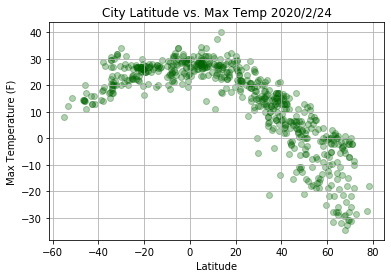

In [34]:
# scatter plot for lat vs max. temp.
fig, ax = plt.subplots()
#plt.scatter(weather_table["Lat"], weather_table["Max Temp"], marker="o")
plt.scatter(x=latitude, y=max_temp, marker = "o", color="DarkGreen", alpha=0.3)

plt.title(f"City Latitude vs. Max Temp {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
ax.grid(True)

plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

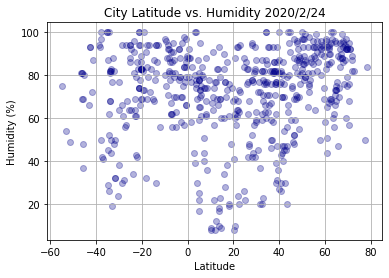

In [40]:
# scatter plot for lat vs humidity
plt.scatter(weather_table["Lat"], weather_table["Humidity"], marker="o", color="DarkBlue", alpha=0.3)

plt.title(f'City Latitude vs. Humidity {today}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

plt.savefig("City Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

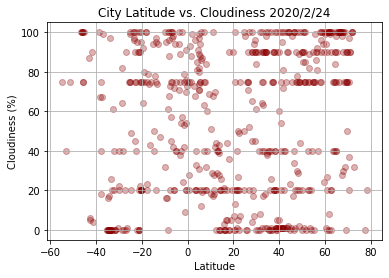

In [44]:
# scatter plot for lat vs cloudiness
plt.scatter(weather_table["Lat"], weather_table["Cloudiness"], marker="o", color="DarkRed", alpha=0.3)

plt.title(f'City Latitude vs. Cloudiness {today}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

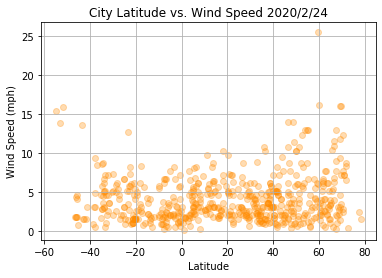

In [46]:
# scatter plot for lat vs wind speed
plt.scatter(weather_table["Lat"], weather_table["Wind Speed"], marker="o", color="DarkOrange", alpha=0.3)

plt.title(f'City Latitude vs. Wind Speed {today}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()